<a href="https://colab.research.google.com/github/tushar-nebhnani/Covid-19-Analysis/blob/main/Covid_CaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CASE STUDY: COVID 2019 DAILY CASES AND PEAK ANALYSIS

These three lines are foundational for most data science workflows in Python. They equip you to efficiently load and manipulate data using pandas, and then create a wide variety of sophisticated plots and charts with matplotlib and seaborn to better understand and present your findings.

In [ ]:
# import of modules
import pandas as pd # # Import the pandas library for data manipulation.
import matplotlib.pyplot as plt # # Import the matplotlib.pyplot module for plotting, commonly aliased as 'plt'.
import seaborn as sns # seaborn module
from tabulate import tabulate # Import the tabulate library for pretty-printing tabular data.

Question 1: How do you load the COVID-19 datasets for confirmed cases, deaths recoveries into Python using pandas?

In [ ]:
# File handling & Reading data from the files
try:
    # Attempt to read the CSV file for confirmed COVID-19 cases into a pandas DataFrame
    confirmed_df = pd.read_csv("/content/covid_19_confirmed_v1_lyst1747728690432.csv")
    # Attempt to read the CSV file for confirmed COVID-19 deaths into a pandas DataFrame
    deaths_raw = pd.read_csv("/content/covid_19_deaths_v1_lyst1747728711771.csv")
    # Attempt to read the CSV file for recovered COVID-19 cases into a pandas DataFrame
    recovered_raw = pd.read_csv("/content/covid_19_recovered_v1_lyst1747728719904.csv")
except FileNotFoundError as e:
    # If a FileNotFoundError occurs (i.e., a file is not found), print an error message
    # 'e' contains the specific error details.
    print(f"Error: {e} - confirmed_cases DataFrame might not be loaded.")
    print(f"Error: {e} - confirmed_deaths DataFrame might not be loaded.")
    print(f"Error: {e} - recovered_cases DataFrame might not be loaded.")
else:
    # This block executes if no exceptions were raised in the 'try' block.
    # It indicates that all files were successfully loaded.
    print("Data successfully loaded from the files.")
finally:
    # This block always executes, regardless of whether an exception occurred or not.
    # It signifies the completion of the file handling operation.
    print("Execution complete!")

Data successfully loaded from the files.
Execution complete!


Cleaning the data given by dataFrame

In [ ]:
# Loading files data
# --- Cleaning and preparing the 'confirmed_cases' DataFrame ---
confirmed = confirmed_df[1:].copy() # Create a copy of the DataFrame, excluding the first row. This first row often contains metadata or is a duplicate header.
confirmed.columns = confirmed_df.iloc[0] # Set the column names of the 'confirmed' DataFrame using the actual header row from the original 'confirmed_cases'.
confirmed.reset_index(drop=True, inplace=True) # Reset the DataFrame index to start from 0, discarding the old index.

# --- Cleaning and preparing the 'confirmed_deaths' DataFrame ---
deaths = deaths_raw[1:].copy() # Create a copy of the DataFrame, excluding the first row.
deaths.columns = deaths_raw.iloc[0] # Set the column names of the 'deaths' DataFrame using the actual header row from the original 'confirmed_deaths'.
deaths.reset_index(drop=True, inplace=True) # Reset the DataFrame index to start from 0, discarding the old index.

# --- Cleaning and preparing the 'recovered_cases' DataFrame ---
recoverd = recovered_raw[1:].copy() # Create a copy of the DataFrame, excluding the first row.
recoverd.columns = recovered_raw.iloc[0] # Set the column names of the 'recovered' DataFrame using the actual header row from the original 'recovered_cases'.
recoverd.reset_index(drop=True, inplace=True) # Reset the DataFrame index to start from 0, discarding the old index.

# --- Displaying previews of the original, uncleaned datasets ---
print("\n*** PREVIEW OF OUR DATASET ***")
print("\nConfirmed Cases Preview:")
print(confirmed_df.head()) # Print the first 5 rows of the original 'confirmed_cases' DataFrame.
print("\nDeaths Preview:")
print(deaths_raw.head()) # Print the first 5 rows of the original 'confirmed_deaths' DataFrame.
print("\nRecovered Preview:")
print(recovered_raw.head()) # Print the first 5 rows of the original 'recovered_cases' DataFrame.

Question 2.1: After loading the data what is the structure of each dataset in terms of rows, columns and datatype?  

In [ ]:
print("Confirmed Cases Dataset Info:")
print(confirmed_df.info()) # Print a concise summary of the 'confirmed_cases' DataFrame, including data types, non-null values, and memory usage.

print("\nDeaths Dataset Info:") # Print a newline for better readability before the next output.
print(deaths_raw.info()) # Print a concise summary of the 'confirmed_deaths' DataFrame.

print("\nRecovered Dataset Info:") # Print a newline for better readability before the next output.
print(recovered_raw.info()) # Print a concise summary of the 'recovered_cases' DataFrame.

In [ ]:
# --- Creating a Summary Table ---
# Define the data for a summary table manually.
# Each inner list represents a row: [Dataset Name, Number of Rows, Number of Columns, Data Types Info].
# The data types info is a dictionary summarizing column types.
summary_table = [
    ["Confirmed Cases", 276, 498, {"int64": 494, "float64": 2, "object": 2}],
    ["Deaths", 276, 498, {"object": 498}], # Note: Deaths and Recovered might have all 'object' type initially due to the header adjustment
    ["Recovered", 261, 498, {"object": 498}]
]

# Print the summary table using the 'tabulate' library for a nicely formatted output.
# headers: Defines the column headers for the printed table.
# tablefmt: Specifies the table format (e.g., "grid" for a grid-like appearance).
print(tabulate(
    summary_table,
    headers=["Dataset", "Rows", "Columns", "Data Types"], # Added 'Data Types' header to match summary_table structure
    tablefmt="grid"
))

Question 2.2: Generate plot over time for top countries?

In [ ]:
# Load the confirmed COVID-19 cases dataset from the specified CSV file into a pandas DataFrame.
# This DataFrame 'confirmed_df' is expected to contain geographical information (Province/State, Country/Region, Lat, Long)
# followed by columns representing dates with corresponding cumulative confirmed case counts.
confirmed_df = pd.read_csv('covid_19_confirmed_v1_lyst1747728690432.csv')

# Drop irrelevant columns from the DataFrame.
# 'Province/State', 'Lat', and 'Long' are dropped as the analysis focuses on country-level totals,
# and these granular details are not needed for this specific visualization.
# `axis=1` specifies that columns, not rows, should be dropped.
confirmed_df_melted = confirmed_df.drop(['Province/State', 'Lat', 'Long'], axis=1)

# Group the DataFrame by 'Country/Region' and sum the values across all remaining columns (which are dates).
# This action aggregates confirmed cases from different sub-regions (e.g., states or provinces)
# within the same country, providing a single cumulative confirmed case count for each country per date.
confirmed_df_melted = confirmed_df_melted.groupby('Country/Region').sum()

# Transpose the grouped DataFrame.
# After grouping, 'Country/Region' are rows and dates are columns. Transposing makes 'Date' the index (rows)
# and 'Country/Region' the columns. This format is ideal for time-series plotting, where each column
# represents a distinct time series for a particular country.
confirmed_df_transposed = confirmed_df_melted.T

# Convert the index of the transposed DataFrame to datetime objects.
# The index currently contains date strings; converting them to datetime objects is crucial
# for proper chronological sorting, time-series analysis capabilities, and correct plotting behavior in matplotlib.
confirmed_df_transposed.index = pd.to_datetime(confirmed_df_transposed.index)

# Identify the top 5 countries with the highest cumulative confirmed cases on the latest available date.
# `iloc[-1]` selects the last row of the transposed DataFrame, which corresponds to the latest date.
# `.sort_values(ascending=False)` sorts these latest case counts in descending order.
# `.head(5)` selects the top 5 entries (countries) from the sorted list.
# `.index` extracts the country names (which are now the column headers) of these top 5 entries.
top_countries = confirmed_df_transposed.iloc[-1].sort_values(ascending=False).head(5).index

# Create a new figure and a set of subplots for the visualization.
# `figsize=(12, 6)` sets the dimensions of the plot to 12 inches wide by 6 inches tall,
# providing ample space for the multiple time-series lines.
plt.figure(figsize=(12, 6))

# Loop through each country in the 'top_countries' list.
for country in top_countries:
    # Plot the cumulative confirmed cases for the current 'country' over time.
    # `confirmed_df_transposed.index` provides the dates for the x-axis.
    # `confirmed_df_transposed[country]` provides the cumulative confirmed case counts for the y-axis
    # for the specific country in the current iteration.
    # `label=country` assigns the country's name as the label for its line in the plot's legend.
    plt.plot(confirmed_df_transposed.index, confirmed_df_transposed[country], label=country)

# Set the main title of the plot.
plt.title("Confirmed COVID-19 Cases Over Time (Top 5 Countries)")

# Set the label for the x-axis.
plt.xlabel("Date")

# Set the label for the y-axis.
plt.ylabel("Cumulative Confirmed Cases")

# Display the legend on the plot. The legend uses the 'label' argument provided in the plt.plot() calls,
# helping to differentiate between the lines representing different countries.
plt.legend()

# Add a grid to the plot background. Grids make it easier to read values along both axes
# and to discern trends and specific data points more precisely.
plt.grid(True)

# Automatically adjust plot parameters for a tight layout. This helps prevent labels, titles,
# and axis ticks from overlapping or being cut off, ensuring the plot is visually neat and legible.
plt.tight_layout()

# Rotate the x-axis tick labels (dates) by 45 degrees. This is a common practice for time-series plots
# to prevent date labels from overlapping when there are many data points or long date strings.
plt.xticks(rotation=45)

# Display the generated plot. This command renders the plot to the output.
# Without `plt.show()`, the plot might be created in memory but not shown.
plt.show()

Question 2.3 Generate plot over time for China?

In [ ]:
# Filter the 'confirmed_df' DataFrame to select only the rows where the 'Country/Region' is 'China'.
# This creates a new DataFrame containing all confirmed case data for China, potentially including
# different provinces or states within China.
china_df = confirmed_df[confirmed_df['Country/Region'] == 'China']

# Drop columns that are not needed for calculating the total confirmed cases over time.
# 'Province/State', 'Country/Region', 'Lat', and 'Long' are identifier or geographical columns.
# axis=1 indicates that columns should be dropped.
# .sum() then calculates the sum of confirmed cases across all remaining columns (which are dates).
# This aggregates cases from all provinces/states within China for each date, resulting in a Series
# where the index is the date and values are the total confirmed cases for China on that date.
china_total = china_df.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1).sum()

# Convert the index of the 'china_total' Series (which are date strings) into proper datetime objects.
# This is crucial for accurate time-series plotting and ensures matplotlib handles dates correctly.
china_total.index = pd.to_datetime(china_total.index)

# Create a new figure and a set of subplots for the plot.
# figsize=(12, 6) sets the width of the figure to 12 inches and the height to 6 inches,
# providing a good visual balance for a time-series plot.
plt.figure(figsize=(12, 6))

# Plot the total confirmed COVID-19 cases in China over time.
# china_total.index provides the dates for the x-axis.
# china_total.values provides the cumulative confirmed case counts for the y-axis.
# label='China' assigns a label to this line for the legend.
# color='red' sets the line color to red.
plt.plot(china_total.index, china_total.values, label='China', color='red')

# Set the title of the plot.
plt.title("Confirmed COVID-19 Cases Over Time in China")

# Set the label for the x-axis.
plt.xlabel("Date")

# Set the label for the y-axis.
plt.ylabel("Cumulative Confirmed Cases")

# Add a grid to the plot for better readability, making it easier to follow trends and estimate values.
plt.grid(True)

# Display the legend, which shows the label for the plotted line (e.g., 'China').
plt.legend()

# Adjust plot parameters for a tight layout, ensuring that labels, titles, and axes
# do not overlap or get cut off, making the plot visually appealing.
plt.tight_layout()

# Rotate the x-axis (date) labels by 45 degrees. This is commonly done for time-series plots
# to prevent date labels from overlapping when there are many data points.
plt.xticks(rotation=45)

# Display the generated plot. Without plt.show(), the plot might be created in memory
# but not rendered to the output.
plt.show()

Question 3: Identify these missing values and replace them using a suitable implementation method such as forward filling, for time-series data?


In [ ]:
# --- 1. Check Missing Values BEFORE Forward Fill ---
# Initialize a dictionary to store the count of missing values for each dataset.
# The keys are dataset names and values are lists containing the total number of missing values.
missing_before = {
    "Dataset": ["Confirmed", "Deaths", "Recovered"], # Names of the datasets
    "Missing Values Before": [
        # Calculate the total number of missing (NaN) values in the 'confirmed_df' DataFrame.
        # .isnull() creates a boolean DataFrame where True indicates a missing value.
        # .sum().sum() sums all True values (treated as 1) across the entire DataFrame.
        confirmed_df.isnull().sum().sum(),
        # Calculate total missing values for 'deaths_df'.
        deaths_raw.isnull().sum().sum(),
        # Calculate total missing values for 'recovered_df'.
        recovered_raw.isnull().sum().sum()
    ]
}

# --- 2. Apply Forward Fill (ffill) ---
# Apply the forward fill method to each DataFrame.
# .ffill() propagates the last valid observation forward to fill missing values.
# axis=1 specifies that the filling should occur row-wise (horizontally),
# meaning each missing value is filled with the previous valid value in the same row.
# This is common for time-series data where columns represent successive time points.
confirmed_df_filled = confirmed_df.ffill(axis=1)
deaths_df_filled = deaths_raw.ffill(axis=1)
recovered_df_filled = recovered_raw.ffill(axis=1)

# --- 3. Check Missing Values AFTER Forward Fill ---
# Calculate the total number of missing values in each DataFrame after applying forward fill.
# The results are stored in a list.
missing_after = [
    confirmed_df_filled.isnull().sum().sum(), # Missing values in filled confirmed_df
    deaths_df_filled.isnull().sum().sum(),    # Missing values in filled deaths_df
    recovered_df_filled.isnull().sum().sum()   # Missing values in filled recovered_df
]

# --- 4. Print Results (Before and After) ---
# Print the counts of missing values before applying forward fill.
print("Missing Values BEFORE Forward Fill:")
print("Confirmed:", missing_before["Missing Values Before"][0])
print("Deaths:", missing_before["Missing Values Before"][1])
print("Recovered:", missing_before["Missing Values Before"][2])

# Print a newline for better readability.
print("\nMissing Values AFTER Forward Fill:")
# Print the counts of missing values after applying forward fill.
print("Confirmed:", missing_after[0])
print("Deaths:", missing_after[1])
print("Recovered:", missing_after[2])

Missing Values BEFORE Forward Fill:
Confirmed: 194
Deaths: 195
Recovered: 194

Missing Values AFTER Forward Fill:
Confirmed: 190
Deaths: 190
Recovered: 191

Summary Table:
     Dataset  Missing Values Before  Missing Values After
0  Confirmed                    194                   190
1     Deaths                    195                   190
2  Recovered                    194                   191


In [ ]:
# --- 5. Create and Display a Summary Table ---
# Create a list of lists to form a summary table.
# Each inner list represents a row: [Dataset Name, Missing Before, Missing After].
# This uses a list comprehension to iterate through the datasets.
summary_table = [
    [missing_before["Dataset"][i], missing_before["Missing Values Before"][i], missing_after[i]]
    for i in range(3) # Iterate 3 times for the three datasets (Confirmed, Deaths, Recovered)
]

# Create a pandas DataFrame from the 'summary_table'.
# Assign appropriate column names for clarity.
summary_df = pd.DataFrame(summary_table, columns=["Dataset", "Missing Values Before", "Missing Values After"])

# Print a header for the summary table.
print("\nSummary Table:")
# Display the summary DataFrame, which clearly shows the effectiveness of the forward fill.
print(summary_df)


Summary Table:
     Dataset  Missing Values Before  Missing Values After
0  Confirmed                    194                   190
1     Deaths                    195                   190
2  Recovered                    194                   191


Question 4: Replace blank values in the column with "All Provinces"?

Question 5.1: Analyze the peak number of daily new cases in germany, france and italy? Which country has the highest number of surge in a single day and when did it occur?

In [ ]:
import pandas as pd # It's good practice to import pandas, assuming it's used elsewhere or might be needed for DataFrame operations.

# Define a list of specific countries that we want to analyze.
target_countries = ['Germany', 'France', 'Italy']

# Filter the 'confirmed_df' DataFrame to include only the rows where the 'Country/Region'
# is one of the specified 'target_countries'.
confirmed_filtered = confirmed_df[confirmed_df['Country/Region'].isin(target_countries)]

# Group the filtered data by 'Country/Region' and calculate the sum of all numeric columns.
# This aggregates confirmed cases for each country over all dates, especially useful if
# the original data has multiple entries for the same country (e.g., by province/state).
# numeric_only=True ensures that only numerical columns are considered for summing.
confirmed_by_country = confirmed_filtered.groupby('Country/Region').sum(numeric_only=True)

# Drop 'Lat' (Latitude) and 'Long' (Longitude) columns if they exist. These columns are
# geographical identifiers and are not needed for time-series analysis of case counts.
# errors='ignore' prevents an error from being raised if these columns are already absent.
confirmed_by_country = confirmed_by_country.drop(columns=['Lat', 'Long'], errors='ignore')

# Transpose the DataFrame (.T) to swap rows and columns. This makes dates the index (rows)
# and countries the columns, which is a convenient format for time-series calculations.
# .diff() calculates the difference between consecutive rows along the 'Date' axis.
# Since the 'confirmed_by_country' data is cumulative, .diff() gives the daily *new* cases.
# .fillna(0) replaces any NaN values (which would appear on the first day for each country
# as there's no preceding value to calculate a difference from) with 0.
# .astype(int) converts the resulting daily case counts to integers.
daily_cases = confirmed_by_country.T.diff().fillna(0).astype(int)

# Convert the index of the 'daily_cases' DataFrame to datetime objects.
# This ensures proper chronological order, enables time-based indexing, and allows
# matplotlib to format dates correctly on plots.
# format='%m/%d/%y' specifies the expected format of the date strings in the index.
daily_cases.index = pd.to_datetime(daily_cases.index, format='%m/%d/%y')

# Find the maximum daily new cases for each country.
# This returns a Series where the index is the country and the value is its peak daily new case count.
peak_daily = daily_cases.max()

# Find the date (index) at which the maximum daily new cases occurred for each country.
# This returns a Series where the index is the country and the value is the date of its peak.
peak_dates = daily_cases.idxmax()

# Create a new pandas DataFrame to neatly organize the peak daily new cases and their corresponding dates.
peak_info = pd.DataFrame({
    'Peak Daily New Cases': peak_daily, # The Series containing peak case counts
    'Date of Peak': peak_dates         # The Series containing dates of those peaks
})

# Print a header for the output of the peak daily new cases analysis.
print("Q5.1: Peak Daily New Cases")
# Print the 'peak_info' DataFrame, sorted by 'Peak Daily New Cases' in descending order.
# This allows for easy comparison of which countries experienced the highest single-day surges.
print(peak_info.sort_values(by='Peak Daily New Cases', ascending=False))
print("\n") # Add a newline character for better separation in the console output.

Q5.1: Peak Daily New Cases
                Peak Daily New Cases Date of Peak
Country/Region                                   
France                        117900   2021-04-11
Germany                        49044   2020-12-30
Italy                          40902   2020-11-13




Question 5.2: Compare the number of recovery rates between canada and australia as of December 31, 2020? Which country shows better management to the pandemic according to this metric?

Question 5.3: What is the distribution of death rates in the provinces of Canda? Identify province with highest and lowest death rate as the latest data point?

Question 6.1: Transform the deaths dataset from wide format (where each column represents a date) to long format, where each row represents a single date, ensuring that the date column is in datetime format. How would this transformation be executed?


In [ ]:
# Load the CSV file into a pandas DataFrame.
# header=1 specifies that the second row (index 1) of the CSV contains the column headers.
deaths_df = pd.read_csv("covid_19_deaths_v1_lyst1747728711771.csv", header=1)

# Transform the 'deaths_df' from a wide format to a long format.
# This is useful when you have multiple columns representing measurements over time (dates in this case).
deaths_long = deaths_df.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], # These are the identifier variables that will remain as columns.
    var_name='Date',        # The columns that are "unpivoted" (dates) will become values in this new 'Date' column.
    value_name='Deaths'     # The values from the unpivoted columns will be stored in this new 'Deaths' column.
)

# Convert the 'Date' column to datetime objects.
# This allows for proper time-series operations and filtering based on dates.
# format='%m/%d/%y' specifies the expected format of the date strings (e.g., 'MM/DD/YY').
deaths_long['Date'] = pd.to_datetime(deaths_long['Date'], format='%m/%d/%y')

# Print the first few rows of the transformed DataFrame to verify the structure.
print("Transformed dataset (first few rows):")
print(deaths_long.head())
print("\n") # Add a newline for better readability

Question 6.2:  What is the total number of deaths reported per country up to the current date?


In [ ]:
# Find the most recent date in the 'Date' column of the 'deaths_long' DataFrame.
latest_date = deaths_long['Date'].max()

# Filter the 'deaths_long' DataFrame to get only the rows corresponding to the 'latest_date'.
latest_deaths = deaths_long[deaths_long['Date'] == latest_date]

# Group the 'latest_deaths' DataFrame by 'Country/Region' and calculate the sum of 'Deaths' for each country.
# Then, sort the results in descending order to see countries with the highest death counts first.
total_deaths_by_country = latest_deaths.groupby('Country/Region')['Deaths'].sum().sort_values(ascending=False)

# Print a header for the output.
print("Total deaths by country (top 10):")
# Print the top 10 countries by total deaths.
print(total_deaths_by_country.head(10))
print("\n") # Add a newline for better readability

Question 6.3: What are the top 5 countries with the highest average daily deaths?


In [ ]:
# Group the 'deaths_long' DataFrame by 'Country/Region' and 'Date'.
# Then, calculate the sum of 'Deaths' for each unique country-date combination.
# .reset_index() converts the grouped Series back into a DataFrame,
# turning 'Country/Region' and 'Date' from index levels into regular columns.
deaths_by_country_date = deaths_long.groupby(['Country/Region', 'Date'])['Deaths'].sum().reset_index()

# Calculate the daily new deaths for each country.
# First, group by 'Country/Region' to ensure that .diff() calculates differences
# within each country's time series, preventing cross-country comparisons.
# .diff() calculates the difference between the current 'Deaths' value and the previous one.
# This converts cumulative deaths into daily new deaths.
# .fillna(0) replaces any NaN values (which occur on the first date for each country) with 0.
deaths_by_country_date['Daily_Deaths'] = deaths_by_country_date.groupby('Country/Region')['Deaths'].diff().fillna(0)

# Calculate the average daily deaths for each country.
# Group the DataFrame by 'Country/Region' again and then compute the mean of the 'Daily_Deaths'.
# .sort_values(ascending=False) orders the countries from highest to lowest average daily deaths.
avg_daily_deaths = deaths_by_country_date.groupby('Country/Region')['Daily_Deaths'].mean().sort_values(ascending=False)

# Print the header for the output.
print("Q6.3: Top 5 countries by average daily deaths:")
# Print the top 5 countries from the 'avg_daily_deaths' Series.
# .head(5) selects the first 5 entries (which are the highest due to sorting).
# .round(2) rounds the average daily death count to two decimal places for readability.
print(avg_daily_deaths.head(5).round(2))
print("\n") # Add a newline for better readability in the console output.

Q6.3: Top 5 countries by average daily deaths:
Country/Region
US                1203.05
Brazil             933.31
India              659.86
Mexico             452.34
United Kingdom     259.18
Name: Daily_Deaths, dtype: float64




Question 6.4: How have the total deaths evolved over time in the United States?


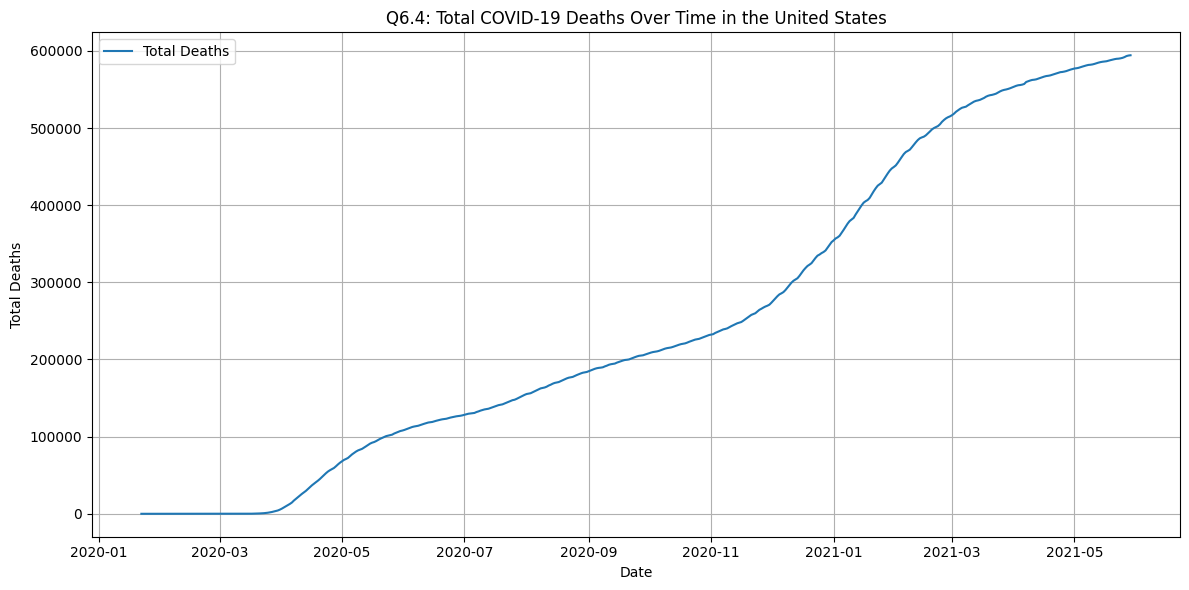

In [ ]:
# Filter the DataFrame to get only the rows corresponding to the 'US' (United States).
# This isolates the death data specifically for the US across all recorded dates.
usa_deaths = deaths_by_country_date[deaths_by_country_date['Country/Region'] == 'US']

# Create a new figure and axes for the plot.
# figsize=(12, 6) sets the width to 12 inches and height to 6 inches,
# providing a good aspect ratio for time-series visualization.
plt.figure(figsize=(12, 6))

# Plot the 'Total Deaths' over 'Date' for the United States.
# 'usa_deaths['Date']' will be on the x-axis (time).
# 'usa_deaths['Deaths']' will be on the y-axis (cumulative death count).
# 'label' provides a name for this line in the legend.
plt.plot(usa_deaths['Date'], usa_deaths['Deaths'], label='Total Deaths')

# Set the title of the plot.
plt.title('Q6.4: Total COVID-19 Deaths Over Time in the United States')

# Set the label for the x-axis.
plt.xlabel('Date')

# Set the label for the y-axis.
plt.ylabel('Total Deaths')

# Add a grid to the plot for better readability of values.
plt.grid(True)

# Display the legend, which uses the 'label' provided in plt.plot().
plt.legend()

# Adjust plot parameters for a tight layout, ensuring elements do not overlap.
plt.tight_layout()

# Display the generated plot.
plt.show()